## Heat Transfer problem with linear initial temperature and steady surface temperature

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import newton
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import numpy.ma as ma
from scipy.integrate  import odeint
from matplotlib import cm
import matplotlib.image as mpimg 

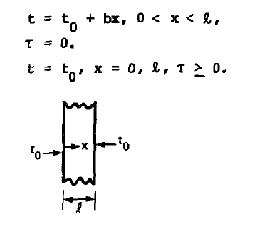

In [10]:
pic = mpimg.imread('screenshot.png')
plt.imshow(pic)
plt.axis('off')
plt.show()

\begin{equation}\begin{aligned}& \frac{{\partial u}}{{\partial t}} = k\frac{{{\partial ^2}u}}{{\partial {x^2}}}\\ & u\left( {x,0} \right) = T_0+bx\hspace{0.25in}u\left( {0,t} \right) = {T_0}\hspace{0.25in}\,\,\,\,\,u\left( {L,t} \right) = {T_0}\end{aligned}\label{eq:eq1}\end{equation}

This question can be easily solved by Fourier sine series, but we cannot use separation of variables directly since it has nonhomogeneous boundary conditions. Here we us a little trick:
Let:$$v(x,t)=u(x,t)-T_0$$
    

Then the heat equation can be rewritten as:
$$ \frac{\partial v}{\partial t}=k\frac{\partial^2 v}{\partial x^2}$$
with the homogeneous boundary conditions:
$$v(x,0)=bx, v(0,t)=0, v(L,t)=0$$

The solution can be given by Fourier sine series as:
$$v\left( {x,t} \right) = \sum\limits_{n = 1}^\infty  {{B_n}\sin \left( {\frac{{n\pi x}}{L}} \right){{\bf{e}}^{ - k{{\left( {\frac{{n\pi }}{L}} \right)}^2}\,t}}}$$
where the coefficient $B_n$ is:
\begin{align*}{B_{\,n}} & = \frac{2}{L}\int_{{\,0}}^{{\,L}}{{bx\sin \left( {\frac{{n\,\pi x}}{L}} \right)\,dx}} = \frac{2b}{L}\left. {\left( {\frac{L}{{{n^2}{\pi ^2}}}} \right)\left( {L\sin \left( {\frac{{n\,\pi x}}{L}} \right) - n\pi x\cos \left( {\frac{{n\,\pi x}}{L}} \right)} \right)} \right|_0^L\\ &  = \frac{2b}{{{n^2}{\pi ^2}}}\left( {L\sin \left( {n\,\pi } \right) - n\pi L\cos \left( {n\,\pi } \right)} \right)\end{align*} 

It follows that:
$$B_n = \frac{(-1)^{n+1}2bL}{n\pi}$$

The final solution is given as:
$$\frac{u(x,t)-T_0}{bl}=\frac{2}{\pi}\sum\limits_{n = 1}^\infty \frac{(-1)^{n+1}}{n}sin(\frac{n\pi x}{L})e^{-k(\frac{n\pi}{L})^2 t}$$

##### Discussion:
In transient heat transfer problems,introduce the dimensionless number: Fourier number ,noted as $Fo$

$$Fo=\frac{kt}{L^2}$$ 
where k is the thermal diffusivity in $m^2/s$. 
The physical meaning of $Fo$ is:
$$Fo = \frac{\text{diffusive transport rate}}{\text{storage rate}}$$
$Fo$ can act as "Dimentionless time" in related analysis since the originial heat equation:
$$\frac{\partial u}{\partial t} = k \frac{\partial^2 u}{\partial x^2}$$ can be rewritten as the dimentionless form:
$$\frac{\partial u}{\partial \Theta} = \frac{\partial^2 u}{\partial X^2}$$
where $\Theta = Fo$ and $X=\frac{x}{L}$

##### Visualize the Fourier series

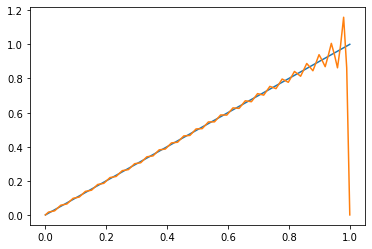

In [12]:
x = np.linspace(0,1,100)
y1 = x
a = 0
fig, ax = plt.subplots()
for n in range (1,50):
    B = ((-1)**(n+1))/n
    a = a+ B*np.sin(n*math.pi*x)
y2 = 2*a/math.pi
ax.plot(x,y1)
ax.plot(x,y2)

##### Draw the temperature profile:

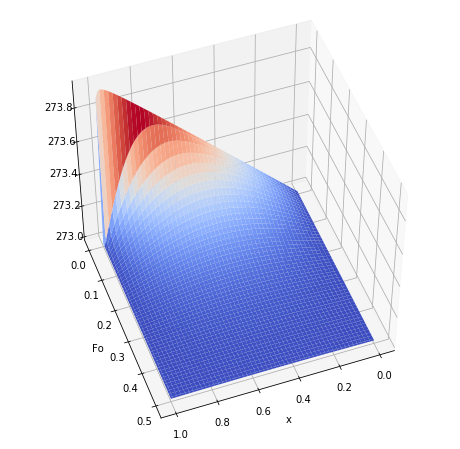

In [3]:
x = np.linspace(0,1,100)
fo = np.linspace(0,0.5,100)
xv, fov = np.meshgrid(x,fo)
a = 0
for n in range (1,200):
    B = ((-1)**(n+1))/n
    a = a+ (B*np.sin(n*math.pi*xv)*np.exp((-(n**2)*(math.pi)**2)*fov))
u = (2*a)/(math.pi)+273
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xv, fov, u, cmap=cm.coolwarm)
ax.set_xlabel('x')
ax.set_ylabel('Fo')
ax.view_init(elev=50, azim=70)
# Set To=273K and coefficients b=1, L=1

A perfect visualization of Fourier series in heat transfer problems is given by
[3Blue1Brown Solve the heat equations](https://www.youtube.com/watch?v=ToIXSwZ1pJU&t=127s)